<a href="https://colab.research.google.com/github/Sayan3sarkar/Multi_Class_Wine_Quality_Predictor/blob/master/Wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Multiclass Classification  of wine quality prediction</h1>

<h3> Importing libraries</h3>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<h3>Importing Dataset</h3>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

In [0]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Datasets'

/content/gdrive/My Drive/Colab Notebooks/Datasets


In [0]:
#Verifying present working directory
!pwd

/content/gdrive/My Drive/Colab Notebooks/Datasets


In [0]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h2> Exploratory Data Analysis on dataset</h2>

In [0]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<h3>Checking for null values</h3>

In [0]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3> We can see that there are no missing values</h3><br>

<h3>Categorizing and visualizing the target variable <i>'quality'</i> </h3>

In [0]:
wine.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

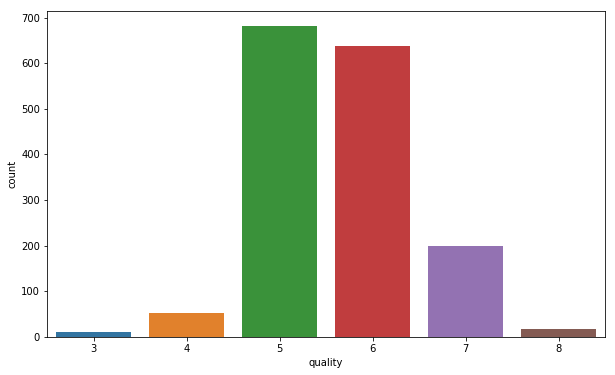

In [0]:
fig = plt.figure(figsize = (10,6))
sns.countplot(wine['quality'])

In [0]:
def plot(x, target = 'quality'):
  sns.factorplot(x = target, y = x, kind = 'bar', data = wine, size = 4 , aspect = 2)
  sns.factorplot(x = target, y = x, kind = 'violin', data = wine, size = 4, aspect = 2)
  sns.factorplot(x = target, y = x, kind = 'box', data = wine, size = 4, aspect = 2)
  sns.factorplot(x = target, y = x, kind = 'swarm', data = wine, size = 4, aspect = 2)

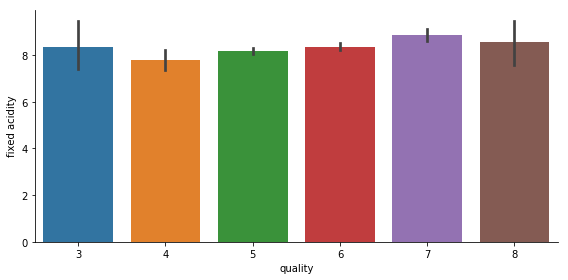

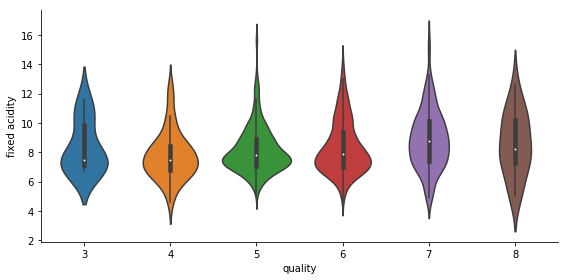

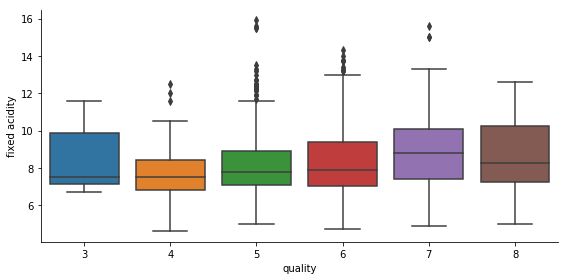

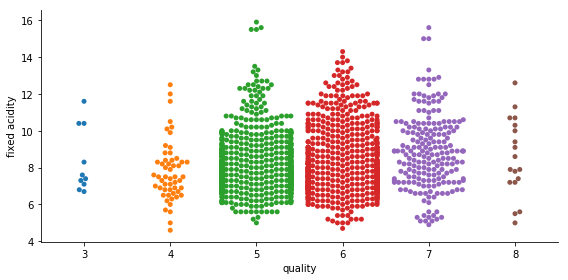

In [0]:
plot('fixed acidity')

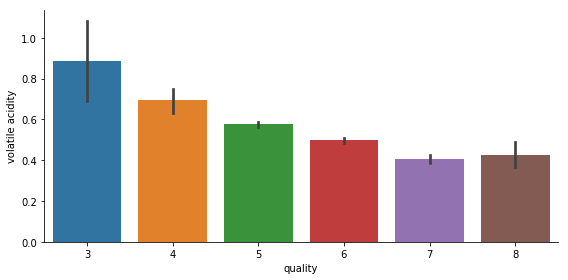

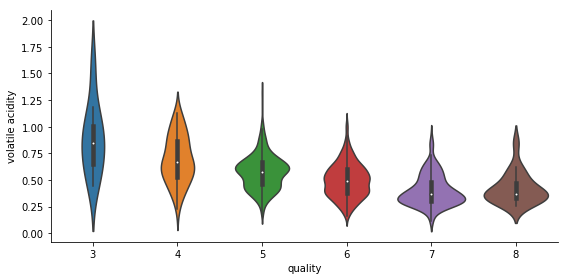

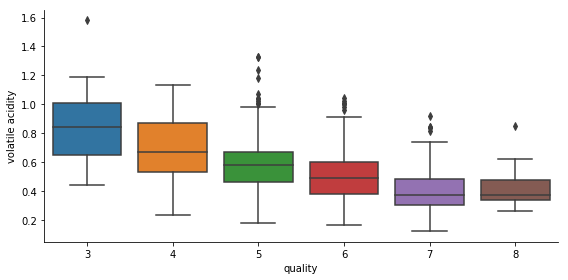

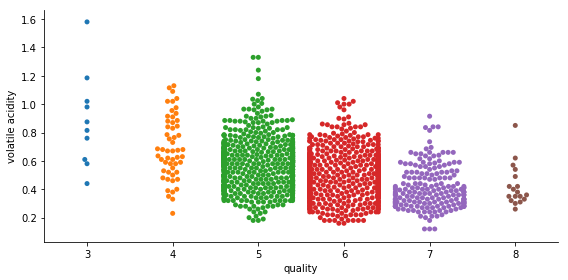

In [0]:
plot('volatile acidity')

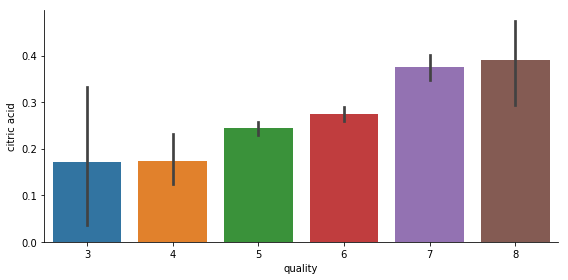

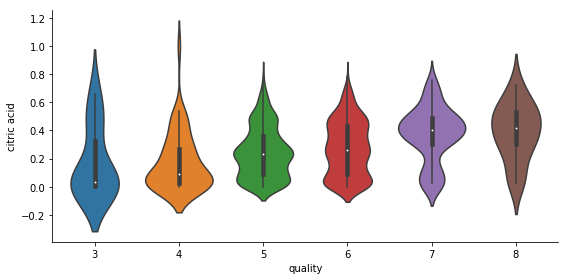

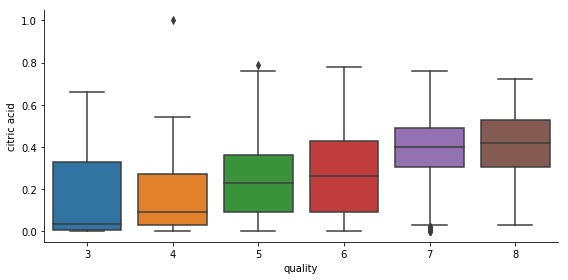

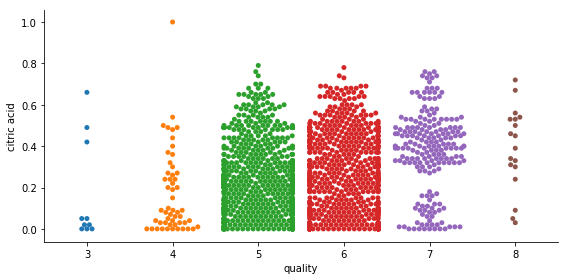

In [0]:
plot('citric acid')

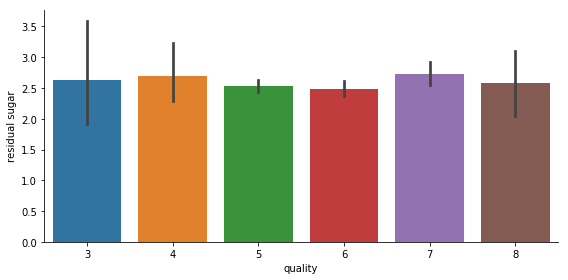

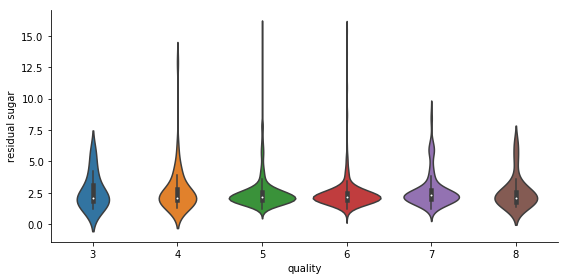

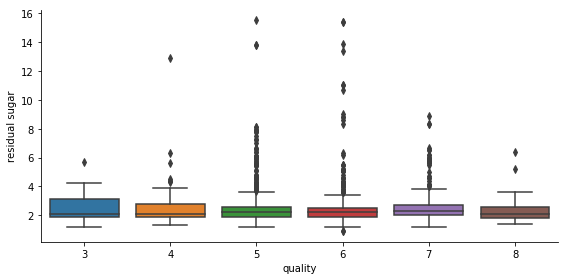

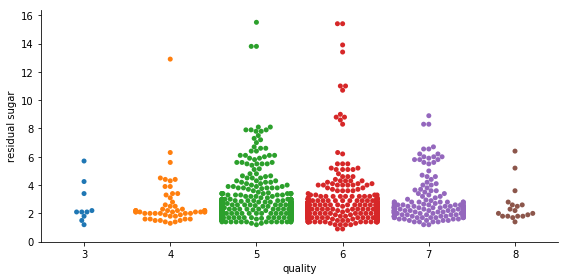

In [0]:
plot('residual sugar')

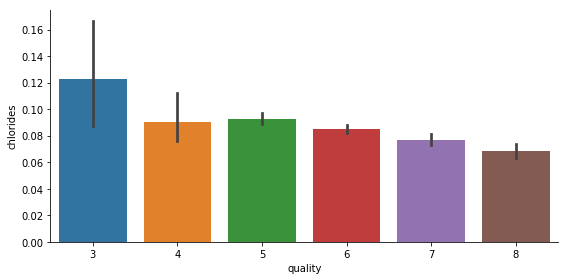

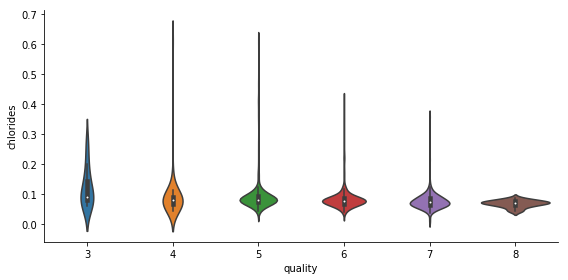

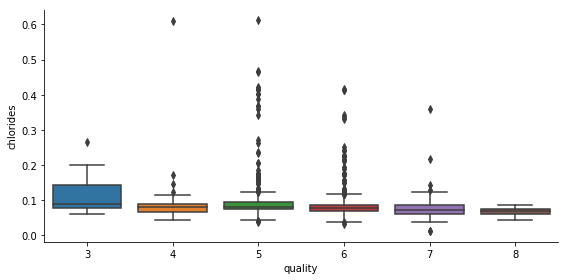

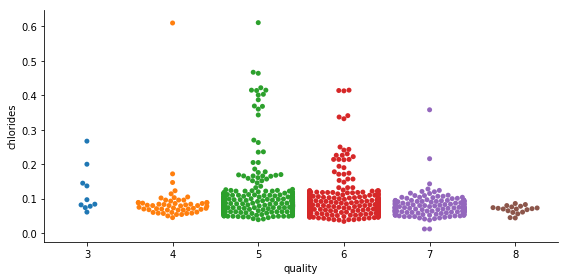

In [0]:
plot('chlorides')

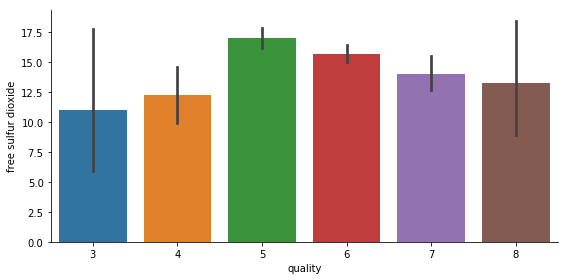

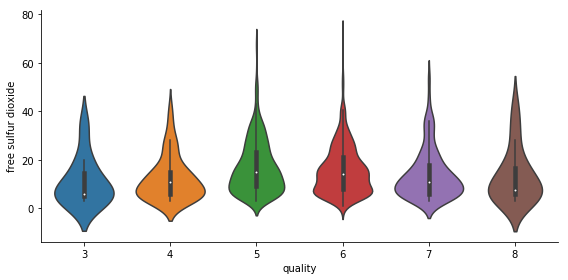

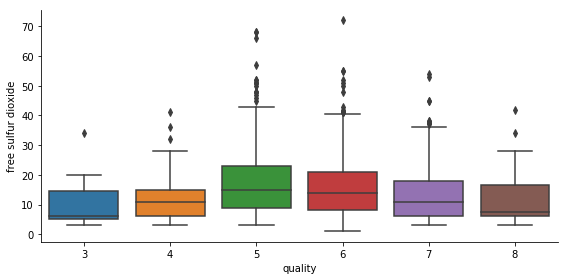

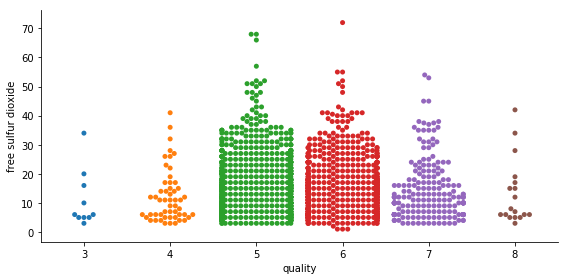

In [0]:
plot('free sulfur dioxide')

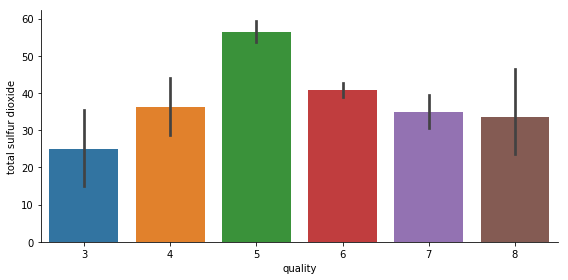

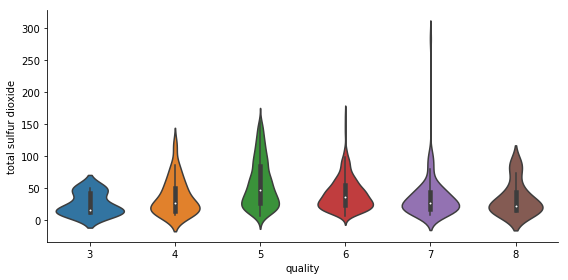

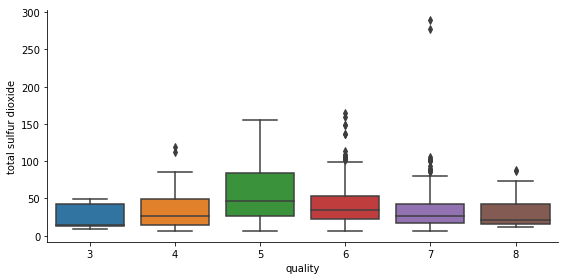

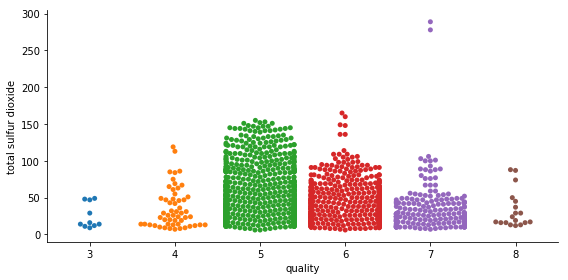

In [0]:
plot('total sulfur dioxide')

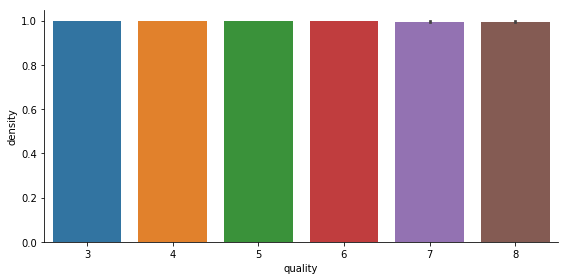

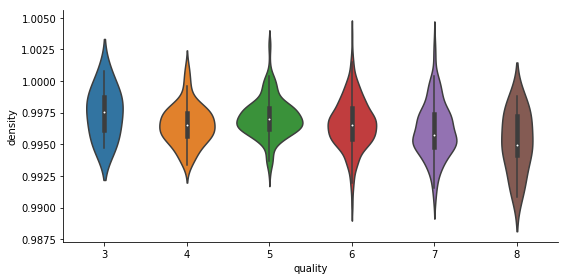

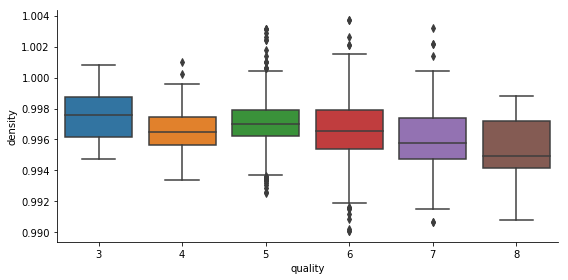

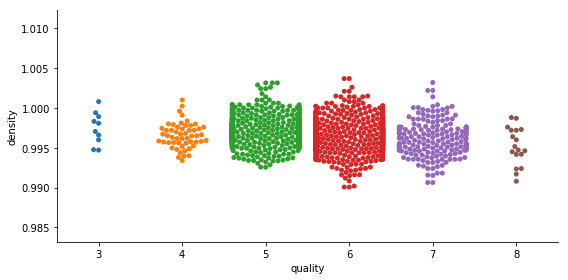

In [0]:
plot('density')

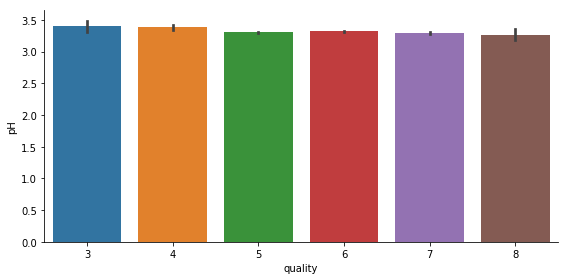

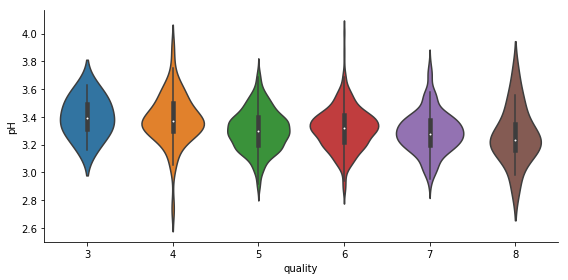

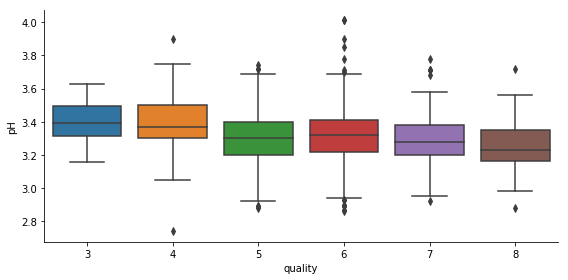

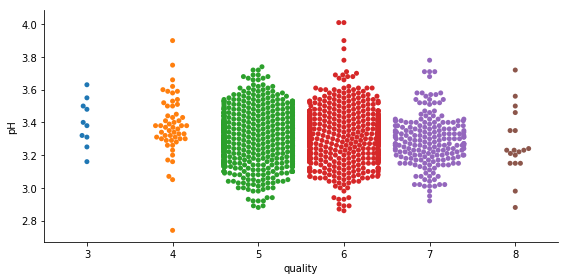

In [0]:
plot('pH')

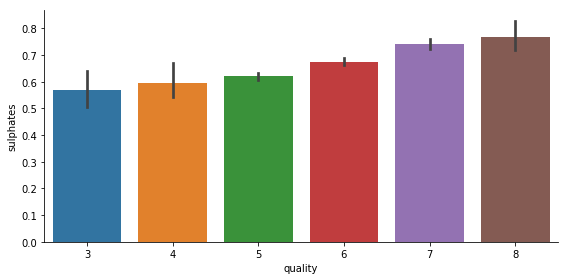

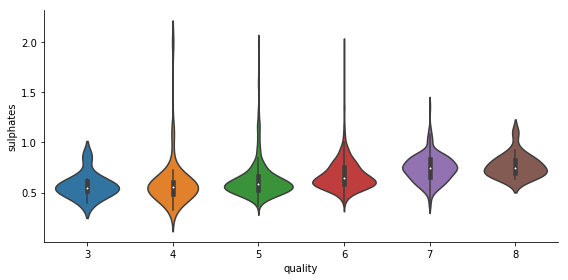

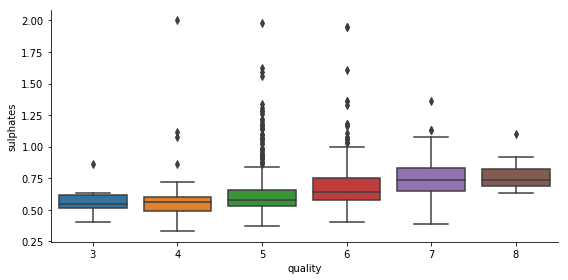

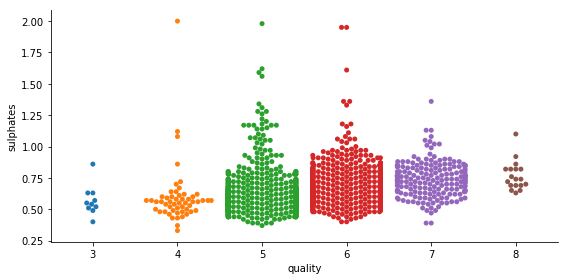

In [0]:
plot('sulphates')

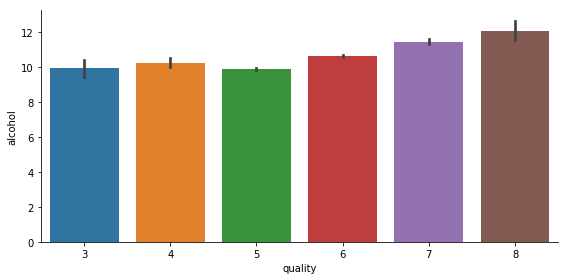

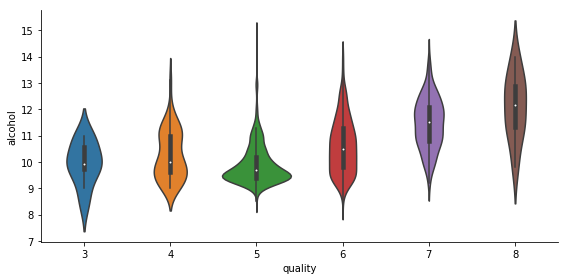

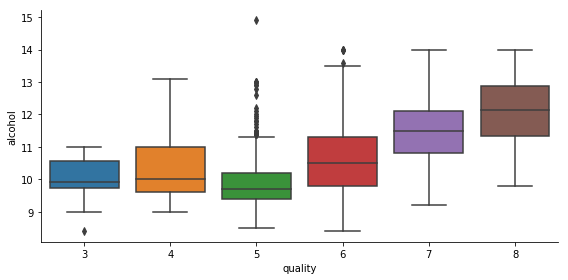

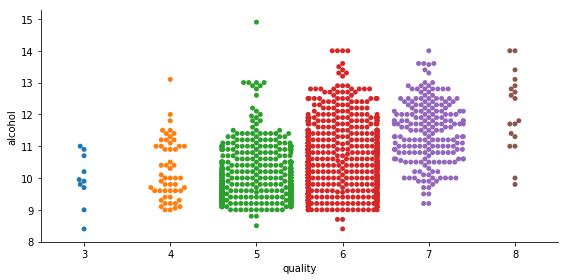

In [0]:
plot('alcohol')

 From above plots, it's quite clear that <b> alcohol </b> and <b> volatile acidity</b> are important features in determining the wine quality

<h3> Splitting dataset into training and test set</h3>

In [0]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

<h3>Scaling the dataset</h3>

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Importing SVC and fitting our model</h3>

In [0]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 7)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=7,
    shrinking=True, tol=0.001, verbose=False)

<h3>Running predictions on test set</h3>

In [0]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([5, 5, 6, ..., 5, 6, 6])

<h3>Performance Evaluation</h3>

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_svc)

array([[  0,   0,   4,   3,   0,   0],
       [  0,   0,  23,  19,   1,   0],
       [  0,   0, 397, 154,   4,   0],
       [  0,   0, 173, 310,  14,   0],
       [  0,   0,   9, 117,  35,   0],
       [  0,   0,   0,  14,   3,   0]])

From above confusion matrix we find that our model is (742/1280) = <b>57.96%</b> accurate which is not at all desirable. So we perform <a href = "https://machinelearningmastery.com/k-fold-cross-validation/" >k-fold cross validation</a> in order to imporve our model accuracy. We train our model using <b>10</b> folds. 

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc, X = X_train,y = y_train, cv = 10, n_jobs = -1)

In [0]:
accuracies.mean()

0.6798195957268538

In [0]:
accuracies.std()

0.045101857061863884

### We have reached a higher accuracy for our model at <b>67.98%</b>

### But we aim to achieve the best possible accuracy for our model. So we tune the hyper parameters of our model using <a href= "https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998">GridSearchCV</a>.

In [0]:
from sklearn.model_selection import GridSearchCV
param = {
    'C' : [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.2],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.2]
}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [0]:
grid_svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=7, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.2],
                         'gamma': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.2],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
grid_svc.best_params_

{'C': 0.75, 'gamma': 0.25, 'kernel': 'rbf'}

In [0]:
grid_svc.best_score_

0.6990595611285266

<h3> We can see that using the best available parameters obtained using <i>Grid Search</i>, we can obtain an accuracy of <i>69.90%</i> from our model